[Annotated Heatmaps of a Correlation Matrix in 5 Simple Steps](https://towardsdatascience.com/annotated-heatmaps-in-5-simple-steps-cc2a0660a27d)

Si calculamos la similitud entre las listas de palabras obtendremos una matriz con valores entre 0 y 1. Cuanto más parecidas sean las listas más cercano a uno será el valor. Esto nos dará una idea de si las listas son lo suficientemente independientes para discriminar los distintos ODS.

Con dicha matriz puede hacer un mapa de calor análogo al que haríamos con una matriz de correlación.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy

In [2]:
nlp = spacy.load("es_core_news_lg")

palabras = pd.read_feather('../data/diccionario_palabras_ods')

words_list = palabras[['ODS.1', 'PALABRAS']].dropna().groupby('ODS.1')['PALABRAS'].apply(list)
words_list_nlp = [nlp(' '.join(words).lower()) for words in words_list]

In [3]:
ods_1_corr = [words_list_nlp[0].similarity(words) for words in words_list_nlp]
ods_1_corr

[1.0,
 0.7406582865881278,
 0.777484136372669,
 0.7400906537361577,
 0.8423983697121271,
 0.5734681087726167,
 0.525517752709135,
 0.8373921416171839,
 0.6850122283513499,
 0.8648187700827098,
 0.7251068357872396,
 0.7190904731503747,
 0.6158925400586936,
 0.5555295425448967,
 0.7305391392485445,
 0.817884758392156,
 0.6622557625327903]

In [4]:
ods_corr = [[words1.similarity(words2) for words2 in words_list_nlp] for words1 in words_list_nlp]

In [5]:
corr_matrix = pd.DataFrame(ods_corr)

In [6]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

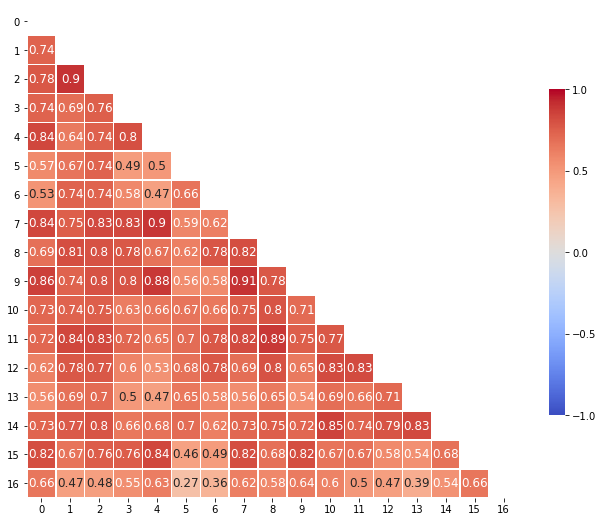

In [9]:
f, ax = plt.subplots(figsize=(11, 15)) 

heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

f.savefig('../img/ods_corr.svg')

Como sospechábamos, hay una similitud muy alta entre las listas de palabras lo que hace difícil clasificar el tipo de ODS.